<a href="https://colab.research.google.com/github/Caffeine-Jared/CSE450-Team/blob/main/Initial_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Model - Working through the example code that was provided by the professor.

Imports

In [70]:
import pandas as pd
# import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# loading in the bikes csv
bikes_df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes_mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')
bikes_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')

# check out the info
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  object 
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


In [71]:
bikes_df.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1


In [72]:
bikes_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        35 non-null     object 
 1   season        35 non-null     int64  
 2   hr            35 non-null     int64  
 3   holiday       35 non-null     int64  
 4   workingday    35 non-null     int64  
 5   weathersit    35 non-null     int64  
 6   hum           35 non-null     float64
 7   windspeed     35 non-null     int64  
 8   temp_c        35 non-null     float64
 9   feels_like_c  35 non-null     float64
dtypes: float64(3), int64(6), object(1)
memory usage: 2.9+ KB


In [73]:
bikes_mini.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
0,12/1/12,4,0,0,0,1,0.81,0,4.22,3.9980
1,12/1/12,4,1,0,0,1,0.81,0,4.22,3.9980
2,12/1/12,4,2,0,0,2,0.81,0,4.22,3.9980
3,12/1/12,4,3,0,0,2,0.81,9,4.22,1.9982
4,12/1/12,4,4,0,0,1,0.81,6,4.22,3.0014


In [74]:
bikes_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        742 non-null    object 
 1   season        742 non-null    int64  
 2   hr            742 non-null    int64  
 3   holiday       742 non-null    int64  
 4   workingday    742 non-null    int64  
 5   weathersit    742 non-null    int64  
 6   hum           742 non-null    float64
 7   windspeed     742 non-null    int64  
 8   temp_c        742 non-null    float64
 9   feels_like_c  742 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 58.1+ KB


In [75]:
bikes_holdout.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
0,12/1/12,4,0,0,0,1,0.81,0,4.22,3.9980
1,12/1/12,4,1,0,0,1,0.81,0,4.22,3.9980
2,12/1/12,4,2,0,0,2,0.81,0,4.22,3.9980
3,12/1/12,4,3,0,0,2,0.81,9,4.22,1.9982
4,12/1/12,4,4,0,0,1,0.81,6,4.22,3.0014


In [76]:
# Preprocessing 
bikes_df['dteday'] = pd.to_datetime(bikes_df['dteday'], format='%m/%d/%y')
bikes_mini['dteday'] = pd.to_datetime(bikes_mini['dteday'], format='%m/%d/%y')
bikes_holdout['dteday'] = pd.to_datetime(bikes_holdout['dteday'], format='%m/%d/%y')

# create new features - year, month, day, dayofweek
bikes_df['year'] = pd.to_datetime(bikes_df['dteday']).dt.year
bikes_df['month'] = pd.to_datetime(bikes_df['dteday']).dt.month
bikes_df['day'] = pd.to_datetime(bikes_df['dteday']).dt.day
bikes_df['dayofweek'] = pd.to_datetime(bikes_df['dteday']).dt.dayofweek

bikes_mini['year'] = pd.to_datetime(bikes_mini['dteday']).dt.year
bikes_mini['month'] = pd.to_datetime(bikes_mini['dteday']).dt.month
bikes_mini['day'] = pd.to_datetime(bikes_mini['dteday']).dt.day
bikes_mini['dayofweek'] = pd.to_datetime(bikes_mini['dteday']).dt.dayofweek

bikes_holdout['year'] = pd.to_datetime(bikes_holdout['dteday']).dt.year
bikes_holdout['month'] = pd.to_datetime(bikes_holdout['dteday']).dt.month
bikes_holdout['day'] = pd.to_datetime(bikes_holdout['dteday']).dt.day
bikes_holdout['dayofweek'] = pd.to_datetime(bikes_holdout['dteday']).dt.dayofweek

# drop dteday column
bikes_df = bikes_df.drop('dteday', axis=1)
bikes_mini = bikes_mini.drop('dteday', axis=1)
bikes_holdout = bikes_holdout.drop('dteday', axis=1)

# one hot encoding
categorical_features = ['season', 'hr', 'holiday', 'workingday', 'weathersit', 'year', 'month', 'day', 'dayofweek']
bikes_df = pd.get_dummies(bikes_df, columns=categorical_features, dtype=int)
bikes_mini = pd.get_dummies(bikes_mini, columns=categorical_features, dtype=int)
bikes_holdout = pd.get_dummies(bikes_holdout, columns=categorical_features, dtype=int)

# min max scaling
scaler = MinMaxScaler()
bikes_df[['temp_c', 'hum', 'feels_like_c', 'windspeed']] = scaler.fit_transform(bikes_df[['temp_c', 'hum', 'feels_like_c', 'windspeed']])
bikes_mini[['temp_c', 'hum', 'feels_like_c', 'windspeed']] = scaler.fit_transform(bikes_mini[['temp_c', 'hum', 'feels_like_c', 'windspeed']])
bikes_holdout[['temp_c', 'hum', 'feels_like_c', 'windspeed']] = scaler.fit_transform(bikes_holdout[['temp_c', 'hum', 'feels_like_c', 'windspeed']])

# creating a total count column
bikes_df['total_count'] = bikes_df['casual'] + bikes_df['registered']
# when it comes to adding these columns together, we don't care about the specifics between casual and registered, we just want the total count, as it provides more information
# additionally, the questions we need to answer surround total count, not casual or registered
# drop casual and registered columns
bikes_df = bikes_df.drop(columns=['casual', 'registered'])
# it's important to scale the numbers as not scaling would cause the model to think that the total count is more important than the other features
# scale bikes_df total_count
#bikes_df[['total_count']] = scaler.fit_transform(bikes_df[['total_count']])
# features and the target
X = bikes_df.drop(columns=['total_count'])
y = bikes_df['total_count']

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [77]:
bikes_df.head()

,hum,windspeed,temp_c,feels_like_c,season_1,season_2,season_3,season_4,hr_0,hr_1,...,day_30,day_31,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,total_count
0,0.81,0.0,0.224490,0.2879,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16
1,0.80,0.0,0.204082,0.2727,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,40
2,0.80,0.0,0.204082,0.2727,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,32
3,0.75,0.0,0.224490,0.2879,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,13
4,0.75,0.0,0.224490,0.2879,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [78]:
X_train.shape

(13309, 92)

In [79]:
bikes_df.head()
bikes_df.to_csv('bikes_output.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'bikes_output.csv'

In [80]:
bikes_mini.head()

,hum,windspeed,temp_c,feels_like_c,season_4,hr_0,hr_1,hr_2,hr_3,hr_4,...,holiday_0,workingday_0,weathersit_1,weathersit_2,year_2012,month_12,day_1,day_2,dayofweek_5,dayofweek_6
0,0.612903,0.000000,0.125,0.363527,1,1,0,0,0,0,...,1,1,1,0,1,1,1,0,1,0
1,0.612903,0.000000,0.125,0.363527,1,0,1,0,0,0,...,1,1,1,0,1,1,1,0,1,0
2,0.612903,0.000000,0.125,0.363527,1,0,0,1,0,0,...,1,1,0,1,1,1,1,0,1,0
3,0.612903,0.529412,0.125,0.181764,1,0,0,0,1,0,...,1,1,0,1,1,1,1,0,1,0
4,0.612903,0.352941,0.125,0.272945,1,0,0,0,0,1,...,1,1,1,0,1,1,1,0,1,0


In [81]:
bikes_holdout.head()

,hum,windspeed,temp_c,feels_like_c,season_1,season_4,hr_0,hr_1,hr_2,hr_3,...,day_29,day_30,day_31,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,0.724638,0.000000,0.26087,0.322546,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.724638,0.000000,0.26087,0.322546,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.724638,0.000000,0.26087,0.322546,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.724638,0.204545,0.26087,0.258037,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.724638,0.136364,0.26087,0.290398,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import math

model = Sequential()
model.add(Dense(64, input_dim=92, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

def lr_schedule(epoch, lr):
    initial_learning_rate = 0.1
    decay_rate = 0.9
    epoch_rate = 10
    return initial_learning_rate * math.pow(decay_rate, math.floor(epoch/epoch_rate))

# Compile the model with your desired optimizer and loss function
optimizer = Adam(learning_rate=0.1)  # Set initial learning rate
model.compile(optimizer=optimizer, loss='mse')

# Create a learning rate callback
lr_callback = LearningRateScheduler(lr_schedule, verbose=1)

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 300, callbacks=[lr_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/300
416/416 [==============================] - 1s 981us/step - loss: 7203.2368 - val_loss: 6196.0137 - lr: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.1.
Epoch 2/300
416/416 [==============================] - 0s 803us/step - loss: 3556.0034 - val_loss: 2603.5166 - lr: 0.1000

Epoch 3: LearningRateScheduler setting learning rate to 0.1.
Epoch 3/300
416/416 [==============================] - 0s 812us/step - loss: 2740.4121 - val_loss: 2696.4883 - lr: 0.1000

Epoch 4: LearningRateScheduler setting learning rate to 0.1.
Epoch 4/300
416/416 [==============================] - 0s 836us/step - loss: 2351.5430 - val_loss: 2174.0667 - lr: 0.1000

Epoch 5: LearningRateScheduler setting learning rate to 0.1.
Epoch 5/300
416/416 [==============================] - 0s 858us/step - loss: 2223.9495 - val_loss: 2195.6753 - lr: 0.1000

Epoch 6: LearningRateScheduler setting learning rate to 0.1.
Epoch 6/300
416/41

In [85]:
# Evaluate the model on the training data
train_mse = model.evaluate(X_train, y_train, verbose = 1)

# Evaluate the model on the testing data
test_mse = model.evaluate(X_test, y_test, verbose = 1)

104/104 [==============================] - 0s 515us/step - loss: 1592.5894


In [86]:
# Get predictions for the testing data
predictions = model.predict(X_test)

# Get the r^2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)

104/104 [==============================] - 0s 495us/step
0.9498959587123107


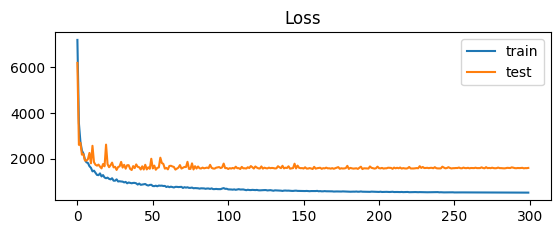

In [87]:
# Plot loss during training (we can do this because we saved a "history" during training)
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()